In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from thalamus_merfish_analysis import ccf_plots as cplots
from thalamus_merfish_analysis import ccf_images as cimg
from thalamus_merfish_analysis import abc_load as abc
get_ipython().run_line_magic('matplotlib', 'inline') 

In [4]:
adata = abc.load_adata_thalamus(transform='raw', subset_to_TH_ZI=True, with_metadata=True,
                       flip_y=False, round_z=True, 
                       with_colors=True, realigned=False)

In [5]:
adata = abc.filter_adata_by_class(adata, filter_nonneuronal=True, 
                                  filter_midbrain=True, 
                                  filter_others=True)

# All cells

In [6]:
obs = abc.get_combined_metadata(realigned=False, version="20230830", drop_unused=False)

In [7]:
obs.head(5).columns

Index(['brain_section_label', 'cluster_alias', 'average_correlation_score',
       'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex',
       'x_section', 'y_section', 'z_section', 'neurotransmitter', 'class',
       'subclass', 'supertype', 'cluster', 'neurotransmitter_color',
       'class_color', 'subclass_color', 'supertype_color', 'cluster_color',
       'x_reconstructed', 'y_reconstructed', 'z_reconstructed',
       'parcellation_index', 'x_ccf', 'y_ccf', 'z_ccf', 'parcellation_organ',
       'parcellation_category', 'parcellation_division',
       'parcellation_structure', 'parcellation_substructure',
       'parcellation_organ_color', 'parcellation_category_color',
       'parcellation_division_color', 'parcellation_structure_color',
       'parcellation_substructure_color', 'left_hemisphere'],
      dtype='object')

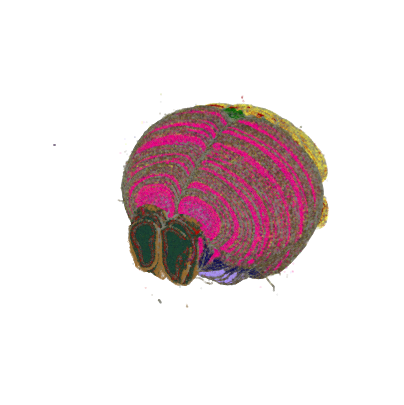

In [21]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(obs.z_ccf, obs.x_ccf, -obs.y_ccf, c=obs.class_color, s=0.01)
ax.axis('off')
ax.grid(b=None)

# see https://stackoverflow.com/a/64849390 for visuals of how to adjust these params
ax.azim = -60
ax.dist = 10
ax.elev = 30
# ax.axis('equal')

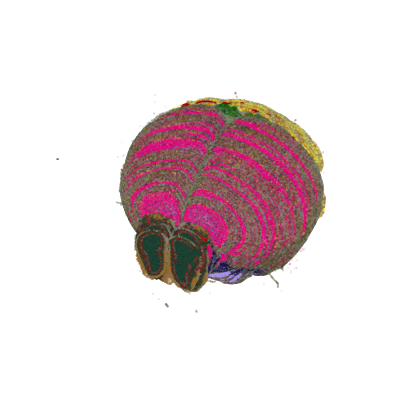

In [20]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(obs.z_ccf, obs.x_ccf, -obs.y_ccf, c=obs.class_color, s=0.01)
ax.axis('off')
ax.grid(b=None)

# see https://stackoverflow.com/a/64849390 for visuals of how to adjust these params
ax.azim = -65
ax.dist = 10
ax.elev = 35
# ax.axis('equal')

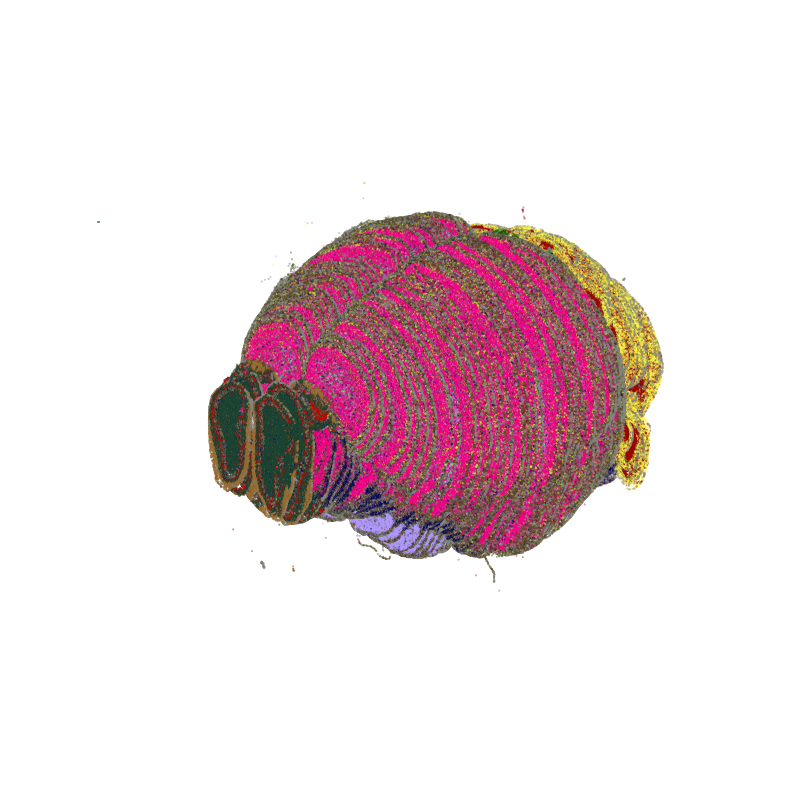

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(obs.z_ccf, obs.x_ccf, -obs.y_ccf, c=obs.class_color, s=0.1)
ax.axis('off')
ax.grid(b=None)

# see https://stackoverflow.com/a/64849390 for a visual guide to adjusting these params
ax.azim = -40 # rotation around z-axis, aka left-right rotation
ax.dist = 10
ax.elev = 20 # angle between the eye and the xy plane, aka up-down rotation
# ax.axis('equal')

# Just TH+ZI cells

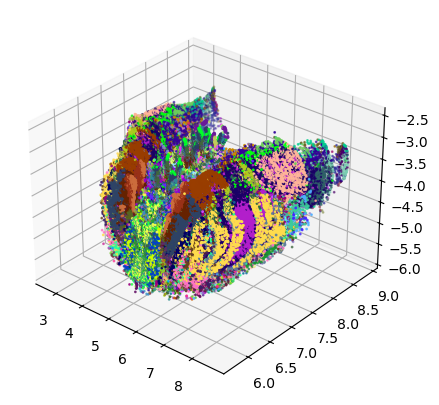

In [45]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(adata.obs.z_ccf, adata.obs.x_ccf, -adata.obs.y_ccf, 
           c=adata.obs.cluster_color, s=1)
# ax.axis('off')
ax.grid(b=None)
ax.axis('auto')

# see https://stackoverflow.com/a/64849390 for a visual guide to adjusting these params
ax.azim = -50 # rotation around z-axis, aka left-right rotation
ax.dist = 10
ax.elev = 30 # angle between the eye and the xy plane, aka up-down rotation

# All cells, "cut open" to show thalamus

In [8]:
th_cut_obs = obs[obs.z_reconstructed<8.0]

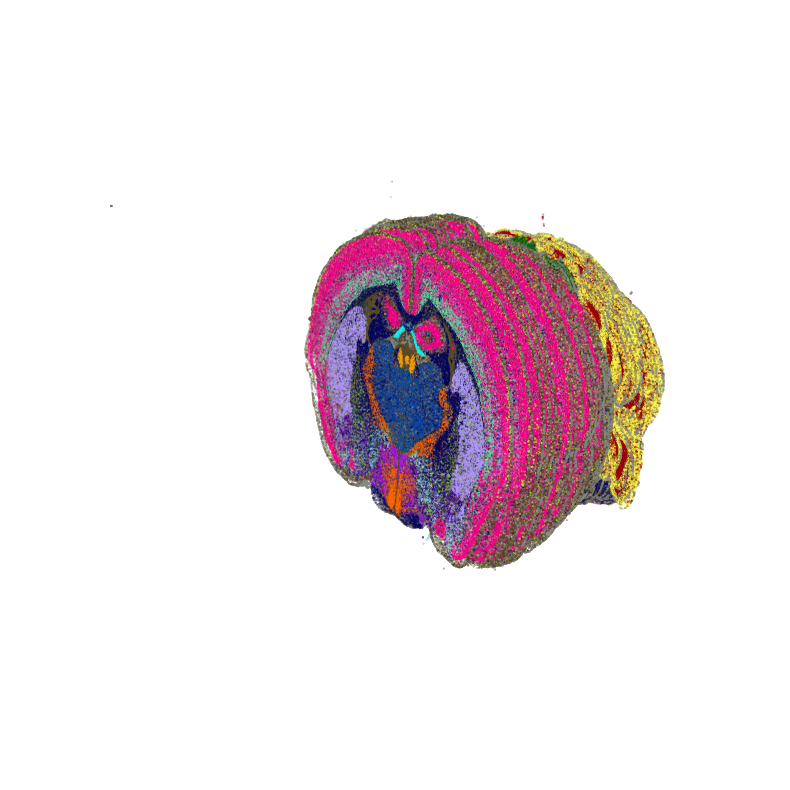

In [63]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(th_cut_obs.z_ccf, th_cut_obs.x_ccf, -th_cut_obs.y_ccf, c=th_cut_obs.class_color, s=0.1)
# ax.scatter(obs.z_ccf, obs.x_ccf, -obs.y_ccf, c=obs.class_color, s=0.01, alpha=0.5)
ax.axis('off')
ax.grid(b=None)

# see https://stackoverflow.com/a/64849390 for a visual guide to adjusting these params
ax.azim = -30 # rotation around z-axis, aka left-right rotation
              # more neg=right; more pos=left
ax.dist = 10 # "zoom" level, aka in-out zoom
ax.elev = 20 # angle between the eye and the xy plane, aka up-down rotation
             # more pos = top-down view; less pos = side view; neg = bottom view
# ax.axis('equal')

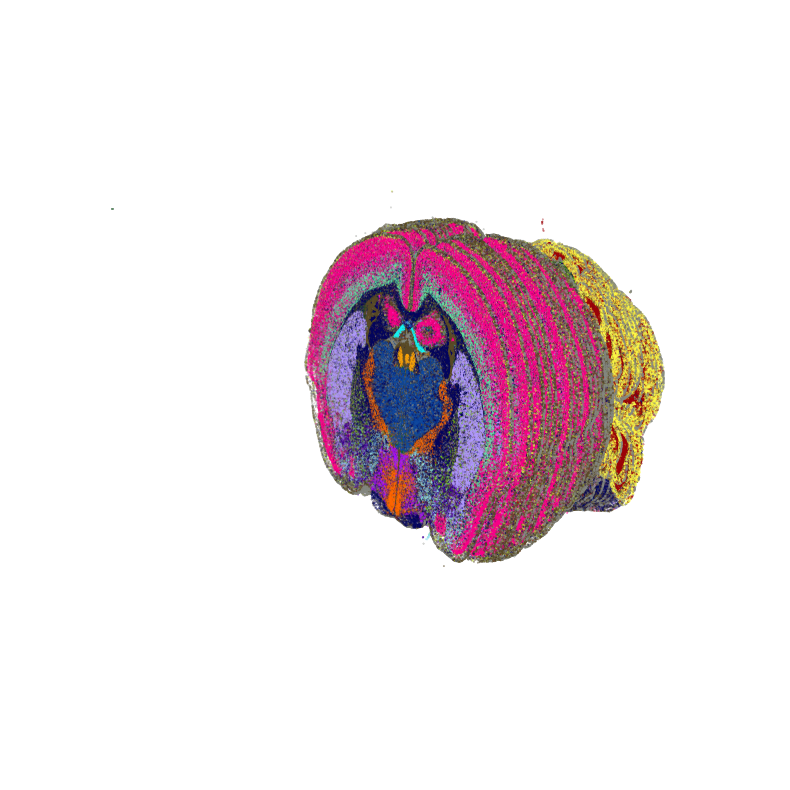

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(th_cut_obs.z_ccf, th_cut_obs.x_ccf, -th_cut_obs.y_ccf, c=th_cut_obs.class_color, s=0.1)
# ax.scatter(obs.z_ccf, obs.x_ccf, -obs.y_ccf, c=obs.class_color, s=0.01, alpha=0.5)
ax.axis('off')
ax.grid(b=None)

# see https://stackoverflow.com/a/64849390 for a visual guide to adjusting these params
ax.azim = -30 # rotation around z-axis, aka left-right rotation
              # more neg=right; more pos=left
ax.dist = 10 # "zoom" level, aka in-out zoom
ax.elev = 15 # angle between the eye and the xy plane, aka up-down rotation
             # more pos = top-down view; less pos = side view; neg = bottom view
# ax.axis('equal')

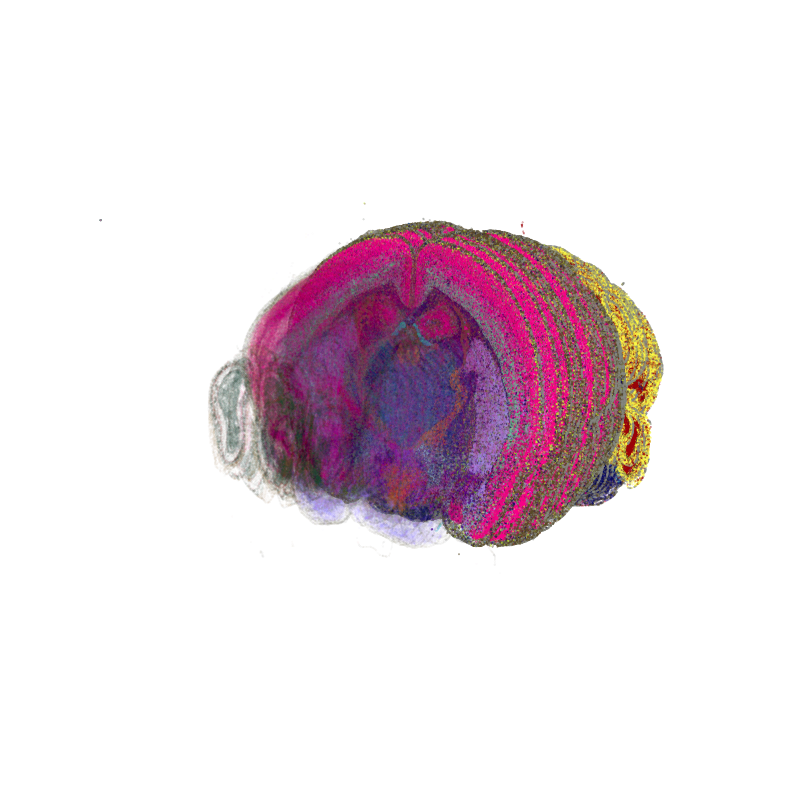

In [64]:
front_obs = obs[obs.z_reconstructed>=8.0]
back_obs = obs[obs.z_reconstructed<8.0]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(back_obs.z_ccf, back_obs.x_ccf, -back_obs.y_ccf, c=back_obs.class_color, s=0.1)
ax.scatter(front_obs.z_ccf, front_obs.x_ccf, -front_obs.y_ccf, c=front_obs.class_color, s=0.01, alpha=0.1)
ax.axis('off')
ax.grid(b=None)

# see https://stackoverflow.com/a/64849390 for a visual guide to adjusting these params
ax.azim = -40 # rotation around z-axis, aka left-right rotation
              # neg=left; pos=right
ax.dist = 10 # "zoom" level, aka in-out zoom
ax.elev = 10 # angle between the eye and the xy plane, aka up-down rotation
             # more pos = top-down view; less pos = side view; neg = bottom view
# ax.axis('equal')